# Data Analysis

For our models, we are going to be analyzing layoff data alongside information
about both the US's foreign aid spending per year and US GDP data.

## Retrieve STOCK DATA

In [64]:
# for data processing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


[*********************100%%**********************]  1 of 1 completed


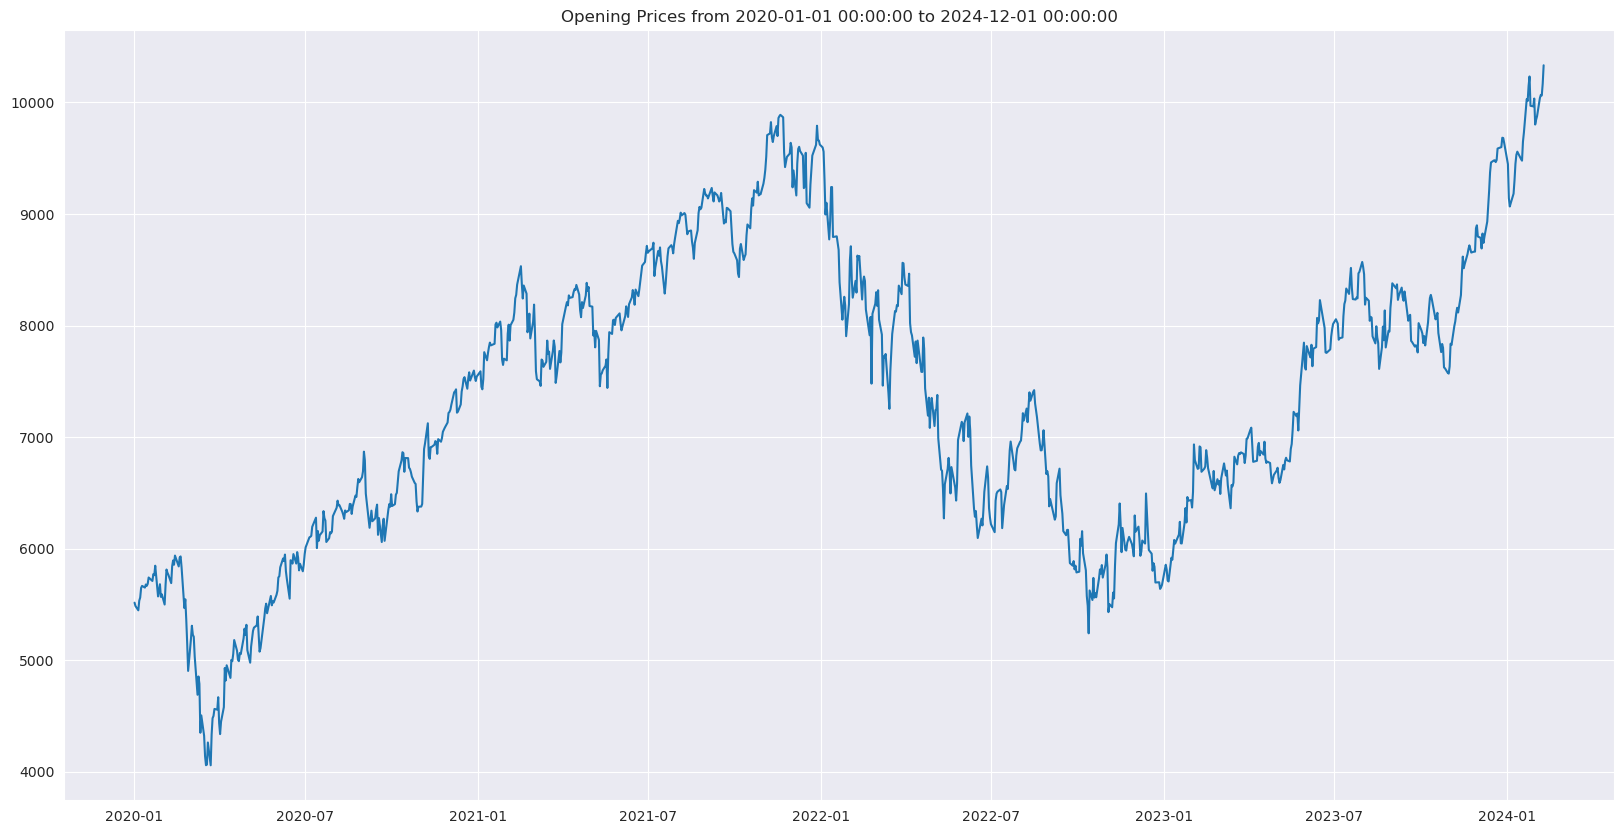

In [65]:
# TODO: weekly price diff (%) parsing from NDXT (NASDAQ 100 Tech companies index); add into data_pd as a new column

# for stock price retrieval
from datetime import datetime, timedelta
import yfinance as yf

# initialize parameters 
start_date = datetime(2020, 1, 1)
end_date = datetime(2024, 12, 1)

# get the data 
stock_data = yf.download('^NDXT', start = start_date,
                         end = end_date)

stock_data.to_csv('stock_data.csv', index = True, encoding='utf-8') # False: not include index

# display 
plt.figure(figsize = (20,10))
plt.title('Opening Prices from {} to {}'.format(start_date,
                                                end_date))
plt.plot(stock_data['Open'])
plt.show()

In [66]:
def date_to_index(stock_data, date):
    date_col_stock_data = stock_data.index.to_pydatetime()
    for i in range(len(date_col_stock_data)):
        if date_col_stock_data[i] == date:
            return i
    return -1

def get_closest_available_date(stock_data, date):
    date_col_stock_data = stock_data.index.to_pydatetime()
    # date_col_stock_data = stock_data.reset_index()['Date']
    while date not in date_col_stock_data:
        date = date - timedelta(days = 1)
    return date

"""
@param stock_data: original stock_data df
@param week_end: layoff date
@param period: number of days to look back, defaults to 7

@return % of change in NDXT index price during last week before layoff date 
"""
def weekly_price_diff(stock_data, week_end, period: int = 7):
    # week end date in format datetime(YYYY,MM,DD)

    if (week_end < datetime(2020, 1, 15)):
        return 0
    date_col_stock_data = stock_data.reset_index() # add DATE as column
    date_end_closest = get_closest_available_date(stock_data, week_end)
    date_start_closest = get_closest_available_date(stock_data, week_end - timedelta(days = period))

    price_end = stock_data['Open'][date_end_closest]
    price_start = stock_data['Open'][date_start_closest]
    price_diff = (price_end - price_start) / price_start * 100

    return price_diff # in PERCENTAGE

# ! USAGE EXAMPLE
price_diff = weekly_price_diff(stock_data, datetime(2022, 4, 11))
price_diff = round(price_diff, 2)
print(f"Diff between 11 APR 2022 and week before: {price_diff}%")

Diff between 11 APR 2022 and week before: -7.59%


In [67]:
# TODO: ADD RETRIEVED STOCK CHANGE TO DATA_PD

week_price_diff_df = pd.DataFrame(index = stock_data.index, columns = ['price_diff'])
for date in week_price_diff_df.index:
    week_price_diff_df.loc[date, 'price_diff'] = weekly_price_diff(stock_data, date)

stock_data['price_diff'] = week_price_diff_df['price_diff']
stock_data.to_csv('stock_data.csv', index = True, encoding='utf-8')
stock_data

,Open,High,Low,Close,Adj Close,Volume,price_diff
Date,,,,,,,
2020-01-02,5515.020020,5577.549805,5513.319824,5577.229980,5577.229980,284700,0
2020-01-03,5484.939941,5541.020020,5481.959961,5512.149902,5512.149902,260400,0
2020-01-06,5446.620117,5501.520020,5441.009766,5500.129883,5500.129883,241100,0
2020-01-07,5532.540039,5573.660156,5511.180176,5558.129883,5558.129883,297200,0
2020-01-08,5560.810059,5622.370117,5551.470215,5595.439941,5595.439941,279300,0
...,...,...,...,...,...,...,...
2024-02-05,10038.919922,10055.419922,9910.219727,10017.660156,10017.660156,0,0.74614
2024-02-06,10067.230469,10068.780273,9866.790039,9966.250000,9966.250000,0,0.324676
2024-02-07,10062.259766,10167.000000,10016.589844,10145.019531,10145.019531,0,2.657164


In [68]:
def str_to_datetime(dt_string):
    return datetime.strptime(dt_string, "%Y-%m-%d %H:%M:%S UTC")

layoff_data = pd.read_csv("tech_layoffs.csv")

layoff_data["Date_layoffs"] = layoff_data["Date_layoffs"].apply(lambda x: str_to_datetime(x))
layoff_data.set_index('Date_layoffs', inplace = True)
layoff_data = layoff_data.sort_index()
layoff_data

,#,Company,Location_HQ,Country,Continent,Laid_Off,Percentage,Company_Size_before_Layoffs,Company_Size_after_layoffs,Industry,Stage,Money_Raised_in_$_mil,Year,lat,lng
Date_layoffs,,,,,,,,,,,,,,,
2020-03-12,3267,Tamara Mellon,Los Angeles,USA,North America,20,40.000000,50,30,Retail,Series C,$90,2020,34.05223,-118.24368
2020-03-13,3266,Panda Squad,San Francisco Bay Area,USA,North America,6,75.000000,8,2,Consumer,Seed,$1,2020,37.77493,-122.41942
2020-03-13,3265,HopSkipDrive,Los Angeles,USA,North America,8,10.000000,80,72,Transportation,Unknown,$45,2020,34.05223,-118.24368
2020-03-16,3262,Inspirato,Denver,USA,North America,130,22.000000,591,461,Travel,Series C,$79,2020,39.73915,-104.98470
2020-03-16,3263,Help.com,Austin,USA,North America,16,100.000000,16,0,Support,Seed,$6,2020,30.26715,-97.74306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-01,3279,Instagram,San Francisco Bay Area,USA,North America,60,13.333333,450,390,Consumer,Acquired,$57,2024,37.45383,-122.18219
2024-11-01,3272,Discord,San Francisco Bay Area,USA,North America,170,17.000000,1000,830,Consumer,Series H,$995,2024,37.77493,-122.41942
2024-11-01,3273,Inmobi,Bengaluru,India,Asia,125,5.000000,2500,2375,Marketing,Unknown,$320,2024,12.97194,77.59369


In [69]:
# TODO: NOW NEED TO ADD ACCORDING STOCK PRICE CHANGE TO LAYOFF_DATA
# layoff_data_with_date_col = layoff_data.reset_index()


## ANALYZE DATA

In [70]:
import seaborn as sns

layoff_data = pd.read_csv("tech_layoffs.csv")
layoff_data

,#,Company,Location_HQ,Country,Continent,Laid_Off,Date_layoffs,Percentage,Company_Size_before_Layoffs,Company_Size_after_layoffs,Industry,Stage,Money_Raised_in_$_mil,Year,lat,lng
0,3,ShareChat,Bengaluru,India,Asia,200,2023-12-20 00:00:00 UTC,15.0,1333,1133,Consumer,Series H,$1700,2023,12.97194,77.59369
1,4,InSightec,Haifa,Israel,Asia,100,2023-12-19 00:00:00 UTC,20.0,500,400,Healthcare,Unknown,$733,2023,32.81841,34.98850
2,6,Enphase Energy,San Francisco Bay Area,USA,North America,350,2023-12-18 00:00:00 UTC,10.0,3500,3150,Energy,Post-IPO,$116,2023,37.54827,-121.98857
3,7,Udaan,Bengaluru,India,Asia,100,2023-12-18 00:00:00 UTC,10.0,1000,900,Retail,Unknown,1500,2023,12.97194,77.59369
4,14,Cruise,San Francisco Bay Area,USA,North America,900,2023-12-14 00:00:00 UTC,24.0,3750,2850,Transportation,Acquired,$15000,2023,37.77493,-122.41942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413,3286,Pitch,Berlin,Germany,Europe,80,2024-08-01 00:00:00 UTC,67.0,119,39,Other,Series B,$138,2024,52.52437,13.41053
1414,3287,BenchSci,Toronto,Canada,North America,70,2024-08-01 00:00:00 UTC,17.0,412,342,Healthcare,Series D,$164,2024,43.70643,-79.39864
1415,3288,NanoString Technology,Seattle,USA,North America,50,2024-08-01 00:00:00 UTC,9.0,556,506,Healthcare,Post-IPO,$826,2024,47.60621,-122.33207
1416,3289,Trigo,Tel Aviv,Israel,Asia,30,2024-04-01 00:00:00 UTC,15.0,200,170,Retail,Series C,$199,2024,32.08088,34.78057


In [71]:
layoff_data.shape

(1418, 16)

In [72]:
layoff_data.isna().sum()

#                              0
Company                        0
Location_HQ                    0
Country                        0
Continent                      0
Laid_Off                       0
Date_layoffs                   0
Percentage                     0
Company_Size_before_Layoffs    0
Company_Size_after_layoffs     0
Industry                       0
Stage                          0
Money_Raised_in_$_mil          0
Year                           0
lat                            0
lng                            0
dtype: int64

In [73]:
layoff_data.describe().round(2)

,#,Laid_Off,Percentage,Company_Size_before_Layoffs,Company_Size_after_layoffs,Year,lat,lng
count,1418.00,1418.00,1418.00,1418.00,1418.00,1418.00,1418.00,1418.00
mean,1823.41,267.39,21.90,3556.23,3288.84,2021.88,33.79,-59.65
std,922.67,877.47,20.66,22478.37,21878.26,1.15,18.81,74.47
min,3.00,3.00,0.04,4.00,0.00,2020.00,-41.29,-123.12
25%,1038.50,40.00,10.00,213.00,151.25,2022.00,34.05,-122.27
50%,1882.50,86.00,15.00,531.00,430.00,2022.00,37.77,-79.40
75%,2616.25,200.00,27.00,1414.75,1200.00,2023.00,42.33,-0.13
max,3290.00,12000.00,100.00,400000.00,392000.00,2024.00,60.17,174.78


In [74]:
# Extract percentage targets
layoff_target = layoff_data['Percentage']
layoff_target

0        15.0
1        20.0
2        10.0
3        10.0
4        24.0
        ...  
1413     67.0
1414     17.0
1415      9.0
1416     15.0
1417    100.0
Name: Percentage, Length: 1418, dtype: float64

In [75]:
# Drop target from remaining features
layoff_df = layoff_data.drop('Percentage', axis=1)
layoff_df

,#,Company,Location_HQ,Country,Continent,Laid_Off,Date_layoffs,Company_Size_before_Layoffs,Company_Size_after_layoffs,Industry,Stage,Money_Raised_in_$_mil,Year,lat,lng
0,3,ShareChat,Bengaluru,India,Asia,200,2023-12-20 00:00:00 UTC,1333,1133,Consumer,Series H,$1700,2023,12.97194,77.59369
1,4,InSightec,Haifa,Israel,Asia,100,2023-12-19 00:00:00 UTC,500,400,Healthcare,Unknown,$733,2023,32.81841,34.98850
2,6,Enphase Energy,San Francisco Bay Area,USA,North America,350,2023-12-18 00:00:00 UTC,3500,3150,Energy,Post-IPO,$116,2023,37.54827,-121.98857
3,7,Udaan,Bengaluru,India,Asia,100,2023-12-18 00:00:00 UTC,1000,900,Retail,Unknown,1500,2023,12.97194,77.59369
4,14,Cruise,San Francisco Bay Area,USA,North America,900,2023-12-14 00:00:00 UTC,3750,2850,Transportation,Acquired,$15000,2023,37.77493,-122.41942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413,3286,Pitch,Berlin,Germany,Europe,80,2024-08-01 00:00:00 UTC,119,39,Other,Series B,$138,2024,52.52437,13.41053
1414,3287,BenchSci,Toronto,Canada,North America,70,2024-08-01 00:00:00 UTC,412,342,Healthcare,Series D,$164,2024,43.70643,-79.39864
1415,3288,NanoString Technology,Seattle,USA,North America,50,2024-08-01 00:00:00 UTC,556,506,Healthcare,Post-IPO,$826,2024,47.60621,-122.33207
1416,3289,Trigo,Tel Aviv,Israel,Asia,30,2024-04-01 00:00:00 UTC,200,170,Retail,Series C,$199,2024,32.08088,34.78057


In [76]:
# Describe features
layoff_df.describe().round(2)

,#,Laid_Off,Company_Size_before_Layoffs,Company_Size_after_layoffs,Year,lat,lng
count,1418.00,1418.00,1418.00,1418.00,1418.00,1418.00,1418.00
mean,1823.41,267.39,3556.23,3288.84,2021.88,33.79,-59.65
std,922.67,877.47,22478.37,21878.26,1.15,18.81,74.47
min,3.00,3.00,4.00,0.00,2020.00,-41.29,-123.12
25%,1038.50,40.00,213.00,151.25,2022.00,34.05,-122.27
50%,1882.50,86.00,531.00,430.00,2022.00,37.77,-79.40
75%,2616.25,200.00,1414.75,1200.00,2023.00,42.33,-0.13
max,3290.00,12000.00,400000.00,392000.00,2024.00,60.17,174.78


/home/penumbrae/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Percentage', ylabel='Count'>

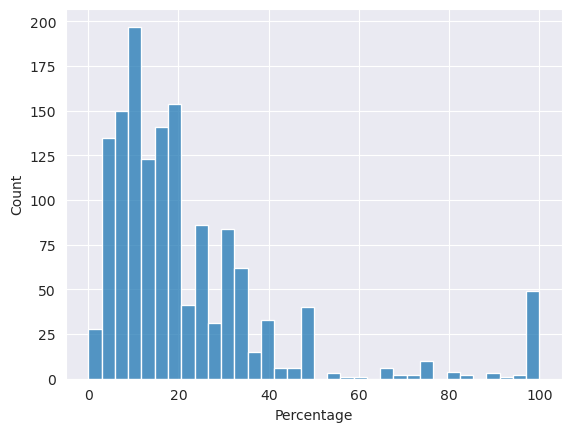

In [77]:
# Plot histogram of layoff percentages
sns.histplot(layoff_target)

/home/penumbrae/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/penumbrae/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/penumbrae/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/penumbrae/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

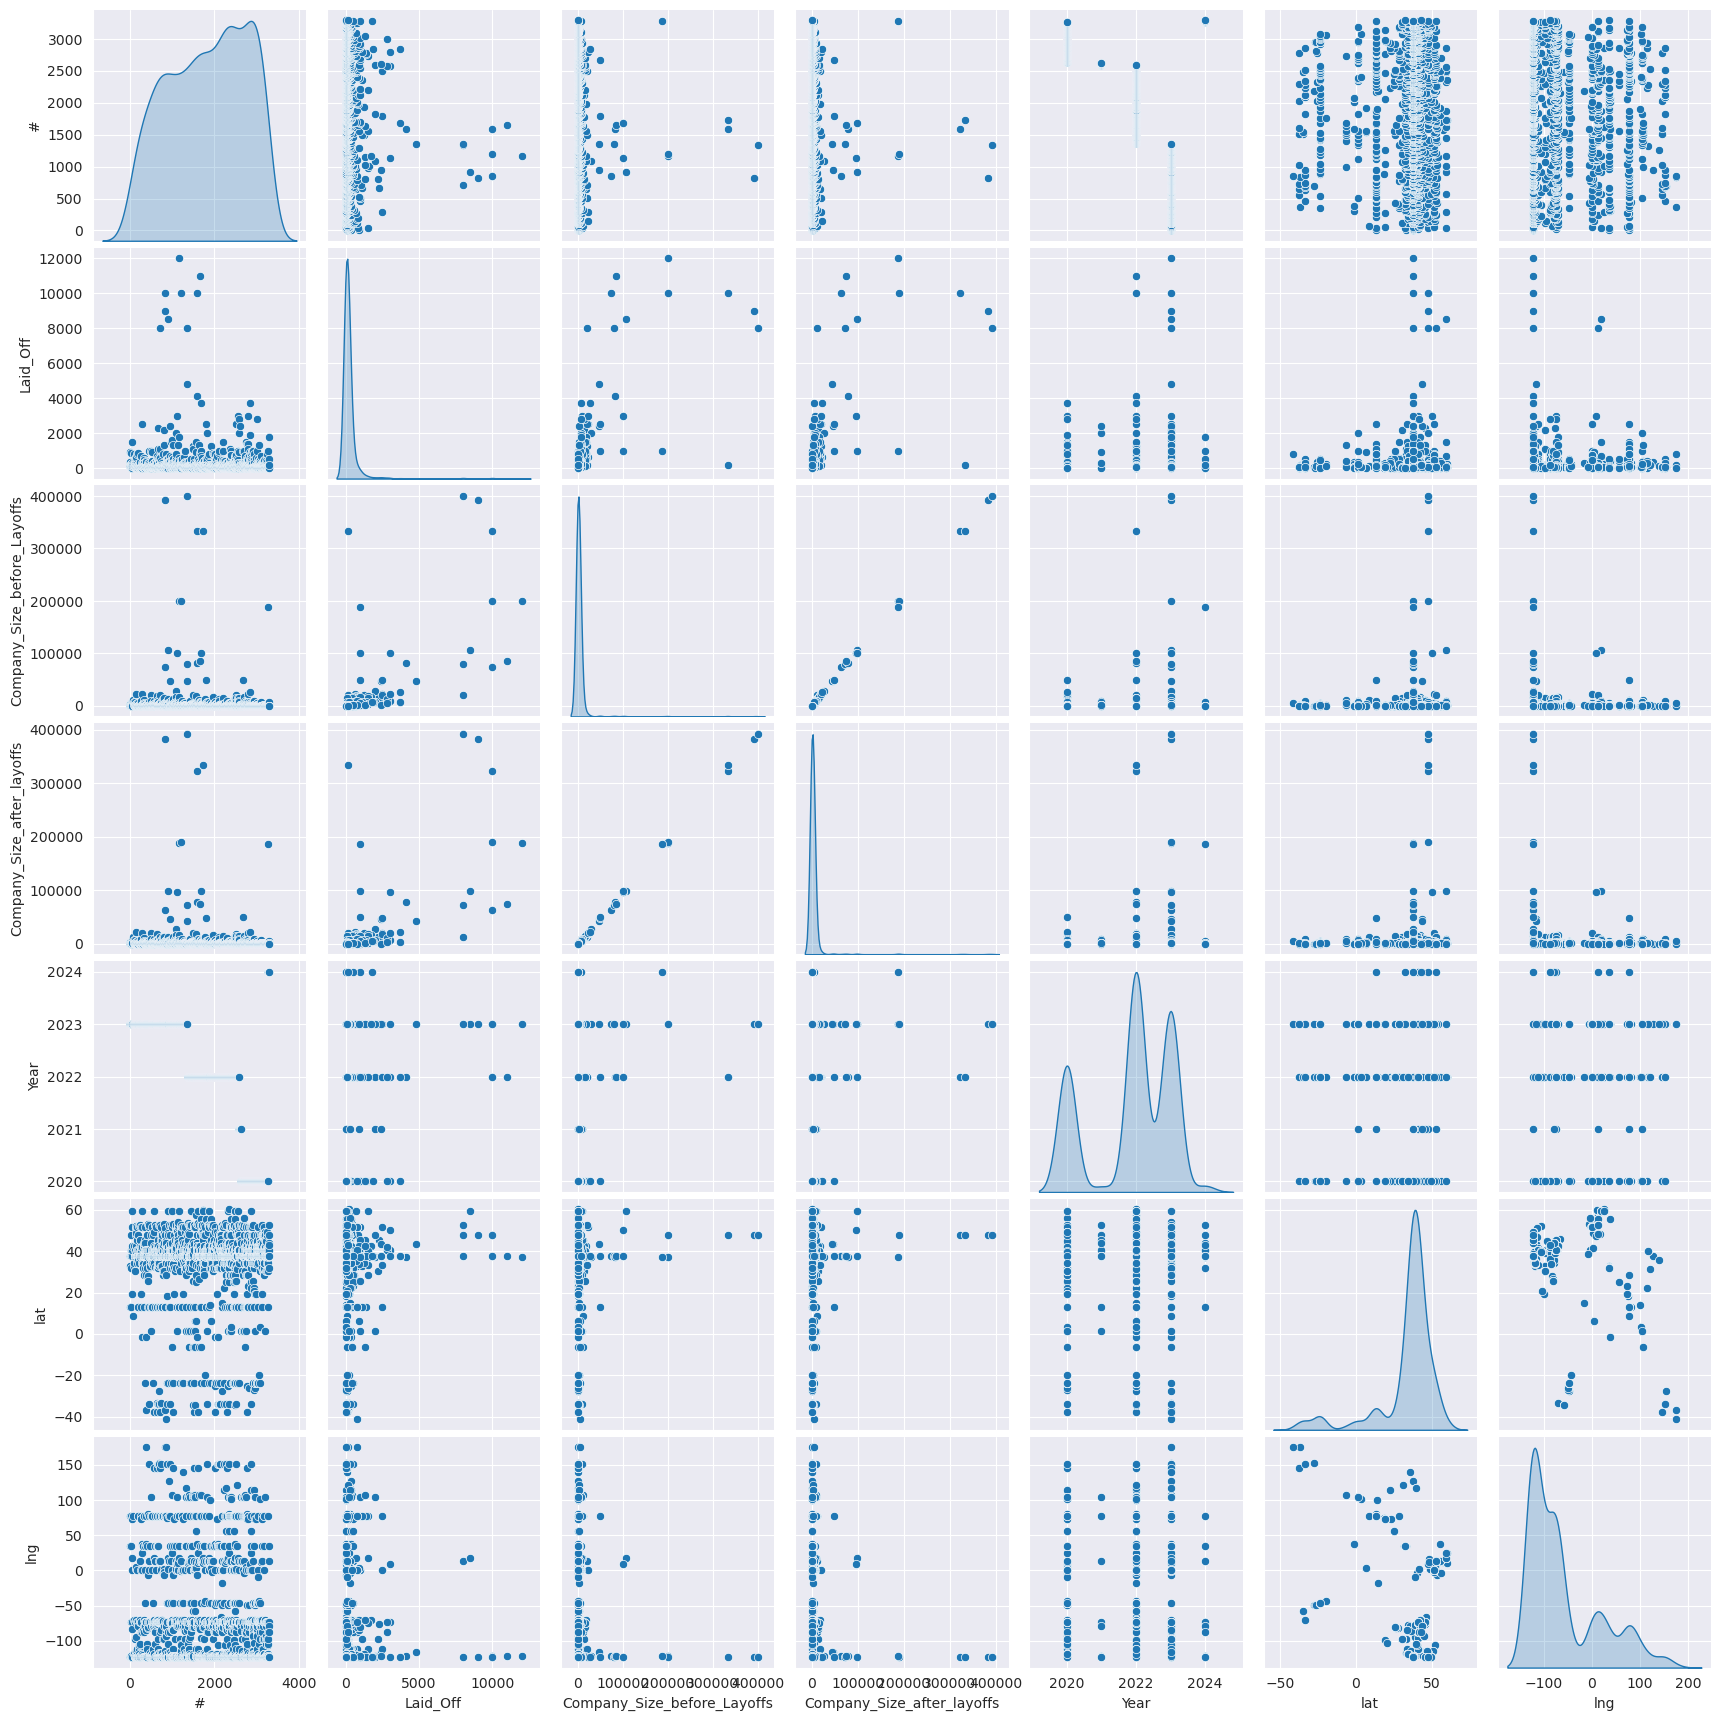

In [78]:
# Create pairplot of features
sns.pairplot(layoff_df, diag_kind='kde')

In [81]:
# Drop qualitative columns
dropped_cols = [
    'Company',
    'Location_HQ',
    'Country',
    'Continent',
    'Industry',
    'Stage',
]

corr_df = layoff_df.drop(columns=dropped_cols)

In [82]:
# Convert money to float for correlations
corr_df = corr_df.replace(to_replace='[\$]', value='', regex=True).astype(float)
corr_df

ValueError: could not convert string to float: '2023-12-20 00:00:00 UTC'

In [83]:
# Create correlation
corr = corr_df.corr()
corr

ValueError: could not convert string to float: '2023-12-20 00:00:00 UTC'

<Axes: >

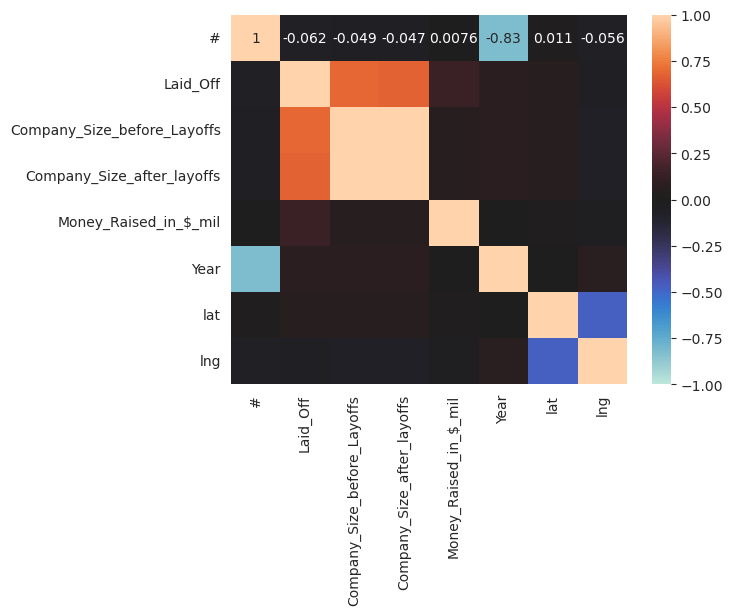

In [84]:
# Plot correlation onto heatmap
sns.heatmap(corr, vmin=-1, vmax=1, center=0, annot=True)

In [ ]:
# NOTE: May want to check correlation between layoff percentage and features

In [85]:
gdp_data = pd.read_csv('country-gdps.csv')
gdp_data

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.727850e+09,2.790850e+09,2.962907e+09,2.983635e+09,3.092429e+09,3.276184e+09,3.395799e+09,2.558906e+09,3.103184e+09,3.544708e+09
1,Africa Eastern and Southern,AFE,GDP (current US$),NY.GDP.MKTP.CD,1.847810e+10,1.936631e+10,2.050647e+10,2.224273e+10,2.429433e+10,2.661956e+10,...,9.863429e+11,1.006992e+12,9.325135e+11,8.900514e+11,1.028394e+12,1.012521e+12,1.006191e+12,9.288802e+11,1.086531e+12,1.185138e+12
2,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,2.014642e+10,2.049713e+10,1.913422e+10,1.811657e+10,1.875346e+10,1.805322e+10,1.879944e+10,1.995593e+10,1.426650e+10,NaN
3,Africa Western and Central,AFW,GDP (current US$),NY.GDP.MKTP.CD,1.041165e+10,1.113592e+10,1.195171e+10,1.268581e+10,1.384900e+10,1.487476e+10,...,8.340970e+11,8.945050e+11,7.692632e+11,6.921149e+11,6.856303e+11,7.681582e+11,8.234056e+11,7.869624e+11,8.449275e+11,8.753937e+11
4,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.323391e+11,1.359668e+11,9.049642e+10,5.276162e+10,7.369016e+10,7.945069e+10,7.089796e+10,4.850156e+10,6.650513e+10,1.067828e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,6.735329e+09,7.074395e+09,6.295848e+09,6.682677e+09,7.180765e+09,7.878760e+09,7.899738e+09,7.717145e+09,9.412034e+09,9.409474e+09
262,"Yemen, Rep.",YEM,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,4.041523e+10,4.322859e+10,4.244449e+10,3.131782e+10,2.684223e+10,2.160616e+10,NaN,NaN,NaN,NaN
263,South Africa,ZAF,GDP (current US$),NY.GDP.MKTP.CD,8.748597e+09,9.225996e+09,9.813996e+09,1.085420e+10,1.195600e+10,1.306899e+10,...,4.008860e+11,3.811989e+11,3.467098e+11,3.235855e+11,3.814488e+11,4.052607e+11,3.893300e+11,3.382914e+11,4.201178e+11,4.052709e+11
264,Zambia,ZMB,GDP (current US$),NY.GDP.MKTP.CD,7.130000e+08,6.962857e+08,6.931429e+08,7.187143e+08,8.394286e+08,1.082857e+09,...,2.803724e+10,2.714102e+10,2.125122e+10,2.095841e+10,2.587360e+10,2.631151e+10,2.330867e+10,1.811064e+10,2.209642e+10,2.916378e+10


In [86]:
gdp_data.isna().sum()

Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960              140
                 ... 
2018                8
2019                8
2020                9
2021               10
2022               23
Length: 67, dtype: int64

In [87]:
gdp_data.describe().round(2)

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
count,1.260000e+02,1.270000e+02,1.280000e+02,1.280000e+02,1.280000e+02,1.400000e+02,1.430000e+02,1.460000e+02,1.510000e+02,1.510000e+02,...,2.590000e+02,2.600000e+02,2.580000e+02,2.580000e+02,2.580000e+02,2.580000e+02,2.580000e+02,2.570000e+02,2.560000e+02,2.430000e+02
mean,7.295339e+10,7.486095e+10,7.866324e+10,8.518005e+10,9.404305e+10,9.429468e+10,1.044708e+11,1.087439e+11,1.136923e+11,1.255383e+11,...,2.482324e+12,2.543694e+12,2.404723e+12,2.437760e+12,2.613243e+12,2.776038e+12,2.817910e+12,2.741618e+12,3.169838e+12,3.479221e+12
std,2.186744e+11,2.282797e+11,2.438626e+11,2.628174e+11,2.877300e+11,3.004628e+11,3.282242e+11,3.474790e+11,3.696235e+11,4.066424e+11,...,8.401587e+12,8.612905e+12,8.172390e+12,8.309604e+12,8.845331e+12,9.414852e+12,9.553275e+12,9.323528e+12,1.068868e+13,1.133619e+13
min,1.201202e+07,1.159202e+07,9.122751e+06,1.084010e+07,1.271247e+07,1.359393e+07,1.446908e+07,1.583511e+07,1.460000e+07,1.585000e+07,...,3.861589e+07,3.876098e+07,3.681194e+07,4.162906e+07,4.527660e+07,4.801526e+07,5.412320e+07,5.174659e+07,6.019641e+07,5.906598e+07
25%,5.151683e+08,5.111424e+08,5.185977e+08,5.150864e+08,5.415796e+08,5.199337e+08,5.894217e+08,5.190310e+08,5.605380e+08,5.988611e+08,...,8.486163e+09,9.034786e+09,8.752203e+09,8.620984e+09,9.319389e+09,1.002804e+10,1.035516e+10,9.754600e+09,1.080873e+10,1.403573e+10
50%,2.661058e+09,2.417629e+09,2.319980e+09,2.680117e+09,2.853831e+09,2.913602e+09,3.039859e+09,3.145743e+09,3.330372e+09,3.787077e+09,...,5.094967e+10,5.339986e+10,4.966767e+10,4.984325e+10,5.400009e+10,5.609719e+10,6.009099e+10,5.373453e+10,6.561177e+10,7.573231e+10
75%,2.398013e+10,2.365180e+10,2.289222e+10,2.428285e+10,2.625211e+10,2.509067e+10,2.793416e+10,2.899389e+10,3.209482e+10,3.636104e+10,...,5.390198e+11,5.478563e+11,5.020845e+11,5.057567e+11,5.369244e+11,5.524163e+11,5.419490e+11,5.470542e+11,6.501228e+11,8.912561e+11
max,1.381135e+12,1.446356e+12,1.546369e+12,1.670666e+12,1.832616e+12,1.994519e+12,2.161645e+12,2.308597e+12,2.491805e+12,2.745216e+12,...,7.771472e+13,7.983716e+13,7.528327e+13,7.651898e+13,8.148410e+13,8.654268e+13,8.777740e+13,8.525774e+13,9.752968e+13,1.013257e+14


In [88]:
foreign_aid_data = pd.read_csv('us-foreign-aid.csv')
foreign_aid_data

,Country Code,Country Name,Region ID,Region Name,Income Group Acronym,Income Group Name,Transaction Type ID,Transaction Type Name,Fiscal Year,current_amount,constant_amount
0,ABW,Aruba,6,Western Hemisphere,HIC,High Income Country,2,Obligations,1999,19000,31338
1,ABW,Aruba,6,Western Hemisphere,HIC,High Income Country,2,Obligations,2000,50000,80787
2,ABW,Aruba,6,Western Hemisphere,HIC,High Income Country,2,Obligations,2004,1000,1487
3,ABW,Aruba,6,Western Hemisphere,HIC,High Income Country,2,Obligations,2005,29270,42255
4,ABW,Aruba,6,Western Hemisphere,HIC,High Income Country,2,Obligations,2006,1000,1398
...,...,...,...,...,...,...,...,...,...,...,...
21549,ZWE,Zimbabwe,5,Sub-Saharan Africa,LMIC,Lower Middle Income Country,3,Disbursements,2019,286696401,321092817
21550,ZWE,Zimbabwe,5,Sub-Saharan Africa,LMIC,Lower Middle Income Country,3,Disbursements,2020,276466581,305559343
21551,ZWE,Zimbabwe,5,Sub-Saharan Africa,LMIC,Lower Middle Income Country,3,Disbursements,2021,314260262,336034603
21552,ZWE,Zimbabwe,5,Sub-Saharan Africa,LMIC,Lower Middle Income Country,3,Disbursements,2022,344133221,344133221


In [89]:
foreign_aid_data.isna().sum()

Country Code               55
Country Name                0
Region ID                   0
Region Name                 0
Income Group Acronym     2384
Income Group Name        2384
Transaction Type ID         0
Transaction Type Name       0
Fiscal Year                 0
current_amount              0
constant_amount             0
dtype: int64

In [90]:
foreign_aid_data.describe().round(2)

,Region ID,Transaction Type ID,current_amount,constant_amount
count,21554.00,21554.00,2.155400e+04,2.155400e+04
mean,3.85,4.02,1.768907e+08,2.835380e+08
std,1.82,5.18,9.854787e+08,1.321976e+09
min,1.00,1.00,-6.382327e+07,-4.976816e+08
25%,2.00,2.00,1.700000e+06,3.102825e+06
50%,5.00,2.00,1.759600e+07,3.056596e+07
75%,5.00,3.00,7.916878e+07,1.291599e+08
max,7.00,18.00,2.594584e+10,4.085656e+10
